<a href="https://colab.research.google.com/github/pela-andrea/people-analytics-case/blob/feat%2Fanalise-dados/scripts/03_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudo de Base de Dados RH – Case Técnico

#Introdução

Neste notebook daremos início à análise de dados para explorar a base de dados de RH, buscando identificar padrões, inconsistências, e potenciais insights que possam apoiar a tomada de decisão.


#**Preparação Inicial**

##Declaração das LIBS

In [1]:
#Principais
import pandas as pd
import numpy as np

#Para visualização
import matplotlib.pyplot as plt
import seaborn as sns

#Para tratamento de datas e warnings
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#Para salvar os arquivos gerados, localmente
from google.colab import files

##Configuração do pandas

In [2]:
# Exibir todas as colunas do dataframe
pd.set_option('display.max_columns', None)

##Importação e Extração dos dados

In [91]:
#Importando a base original diretamente do repositório GitHub
url = 'https://raw.githubusercontent.com/pela-andrea/people-analytics-case/main/data/base_corrigida.csv'

df = pd.read_csv(url, sep=';', decimal=',', encoding='utf-8')

In [92]:
df.head()

,ID do Colaborador,Cargo,Departamento,Localização,Salário,Data de Admissão,Data de Demissão,Está Ativo,Dias de Falta,Dias de Licença Médica,Dias de Férias Usufruídos,Banco de Horas,Horas Extras,Quantidade de Atrasos,Gênero,Estado Civil,Número de Dependentes,Nível de Escolaridade,Avaliação de Desempenho,Percentual de Bônus,Turno,Tipo de Contrato,Centro de Custo,Status de Conformidade,Plano de Saúde,Email,Tempo de Empresa (anos),Período de Experiência Concluído,ID do Gestor,Data da Última Promoção,Data do Último Treinamento,Flag: Promoção após Demissão,Flag: Demissão antes de Admissão,Flag: Treinamento Antes da Admissão
0,EMP_00001,Gerente de RH,Financeiro,Salvador,6993.43,2022-02-26,NaN,Sim,3,2,13,52,20,6,Outro,Viúvo(a),4,Graduação,5,7.58,Manhã,Permanente,CC013,Em conformidade,Padrão,emp_00001@company.com,3.34,Sim,EMP_00495,NaN,2024-07-04,Não,Não,Não
1,EMP_00002,Engenheiro de Dados,Marketing,Belo Horizonte,5723.47,2023-03-04,NaN,Sim,1,1,14,-80,86,6,Masculino,Casado(a),1,Graduação,5,8.72,Manhã,Temporário,CC026,Em conformidade,Básico,emp_00002@company.com,2.33,Sim,EMP_00345,2024-07-21,2024-02-01,Não,Não,Não
2,EMP_00003,Desenvolvedor Python,Operações,Salvador,7295.38,2010-09-01,NaN,Sim,3,5,25,149,23,1,Feminino,Divorciado(a),1,Mestrado,4,7.93,Manhã,Permanente,CC010,Em conformidade,Básico,emp_00003@company.com,14.84,Sim,EMP_00306,2014-10-18,2024-01-11,Não,Não,Não
3,EMP_00004,Analista Financeiro,Operações,Porto Alegre,9046.06,2020-02-26,NaN,Sim,2,1,21,-92,22,5,Masculino,Casado(a),0,Graduação,3,5.27,Manhã,Permanente,CC008,Em conformidade,Padrão,emp_00004@company.com,5.35,Sim,EMP_00971,NaN,2025-01-05,Não,Não,Não
4,EMP_00005,Engenheiro de Dados,Recursos Humanos,Curitiba,5531.69,2011-06-22,NaN,Sim,1,2,15,93,72,3,Masculino,Solteiro(a),0,Graduação,2,10.95,Tarde,Permanente,CC013,Em conformidade,Premium,emp_00005@company.com,14.03,Sim,EMP_00024,NaN,2025-01-19,Não,Não,Não


In [93]:
df.describe()

,Salário,Dias de Falta,Dias de Licença Médica,Dias de Férias Usufruídos,Banco de Horas,Horas Extras,Quantidade de Atrasos,Número de Dependentes,Avaliação de Desempenho,Percentual de Bônus,Tempo de Empresa (anos)
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,6008.196118,2.004200,3.005700,14.997260,50.315640,49.940300,5.009000,1.001760,3.006220,10.031756,7.966760
std,1976.890182,1.416539,1.729152,3.861434,86.698049,29.195358,2.242744,1.002026,1.412325,4.884612,4.334095
min,1500.000000,0.000000,0.000000,3.000000,-100.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000
25%,4642.750000,1.000000,2.000000,12.000000,-24.000000,24.000000,3.000000,0.000000,2.000000,6.630000,4.220000
50%,6003.480000,2.000000,3.000000,15.000000,50.000000,50.000000,5.000000,1.000000,3.000000,9.970000,7.930000
75%,7354.120000,3.000000,4.000000,18.000000,125.000000,75.000000,6.000000,2.000000,4.000000,13.310000,11.720000
max,14958.170000,11.000000,13.000000,32.000000,200.000000,100.000000,15.000000,8.000000,5.000000,32.440000,15.500000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID do Colaborador                    50000 non-null  object 
 1   Cargo                                50000 non-null  object 
 2   Departamento                         50000 non-null  object 
 3   Localização                          50000 non-null  object 
 4   Salário                              50000 non-null  float64
 5   Data de Admissão                     50000 non-null  object 
 6   Data de Demissão                     10026 non-null  object 
 7   Está Ativo                           50000 non-null  object 
 8   Dias de Falta                        50000 non-null  int64  
 9   Dias de Licença Médica               50000 non-null  int64  
 10  Dias de Férias Usufruídos            50000 non-null  int64  
 11  Banco de Horas              

##Tratamento para a análise

In [95]:
#Tratando campos de Data - convertendo corretamente
datas = ['Data de Admissão', 'Data de Demissão', 'Data da Última Promoção', 'Data do Último Treinamento']
for col in datas:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [96]:
#Garantindo que o campo Percentual de bonus seja em percentual
df['Percentual de Bônus'] = df['Percentual de Bônus'].apply(
    lambda x: x / 100 if pd.notnull(x) else x
)

Trocar o termo "Recursos Humanos" para "RH" na coluna Departamento

In [97]:
df['Departamento'] = df['Departamento'].str.replace('Recursos Humanos', 'RH', regex=False)

In [98]:
df.head()

,ID do Colaborador,Cargo,Departamento,Localização,Salário,Data de Admissão,Data de Demissão,Está Ativo,Dias de Falta,Dias de Licença Médica,Dias de Férias Usufruídos,Banco de Horas,Horas Extras,Quantidade de Atrasos,Gênero,Estado Civil,Número de Dependentes,Nível de Escolaridade,Avaliação de Desempenho,Percentual de Bônus,Turno,Tipo de Contrato,Centro de Custo,Status de Conformidade,Plano de Saúde,Email,Tempo de Empresa (anos),Período de Experiência Concluído,ID do Gestor,Data da Última Promoção,Data do Último Treinamento,Flag: Promoção após Demissão,Flag: Demissão antes de Admissão,Flag: Treinamento Antes da Admissão
0,EMP_00001,Gerente de RH,Financeiro,Salvador,6993.43,2022-02-26,NaT,Sim,3,2,13,52,20,6,Outro,Viúvo(a),4,Graduação,5,0.0758,Manhã,Permanente,CC013,Em conformidade,Padrão,emp_00001@company.com,3.34,Sim,EMP_00495,NaT,2024-07-04,Não,Não,Não
1,EMP_00002,Engenheiro de Dados,Marketing,Belo Horizonte,5723.47,2023-03-04,NaT,Sim,1,1,14,-80,86,6,Masculino,Casado(a),1,Graduação,5,0.0872,Manhã,Temporário,CC026,Em conformidade,Básico,emp_00002@company.com,2.33,Sim,EMP_00345,2024-07-21,2024-02-01,Não,Não,Não
2,EMP_00003,Desenvolvedor Python,Operações,Salvador,7295.38,2010-09-01,NaT,Sim,3,5,25,149,23,1,Feminino,Divorciado(a),1,Mestrado,4,0.0793,Manhã,Permanente,CC010,Em conformidade,Básico,emp_00003@company.com,14.84,Sim,EMP_00306,2014-10-18,2024-01-11,Não,Não,Não
3,EMP_00004,Analista Financeiro,Operações,Porto Alegre,9046.06,2020-02-26,NaT,Sim,2,1,21,-92,22,5,Masculino,Casado(a),0,Graduação,3,0.0527,Manhã,Permanente,CC008,Em conformidade,Padrão,emp_00004@company.com,5.35,Sim,EMP_00971,NaT,2025-01-05,Não,Não,Não
4,EMP_00005,Engenheiro de Dados,RH,Curitiba,5531.69,2011-06-22,NaT,Sim,1,2,15,93,72,3,Masculino,Solteiro(a),0,Graduação,2,0.1095,Tarde,Permanente,CC013,Em conformidade,Premium,emp_00005@company.com,14.03,Sim,EMP_00024,NaT,2025-01-19,Não,Não,Não


#Análise

##Análise de Salário

Aqui, o foco é entender como os salários estão distribuídos na empresa. Isso ajuda a ver se há equilíbrio entre áreas e cargos, e se o salário está relacionado com o desempenho ou com os bônus.

Vamos identificar:

- Como os salários variam entre os departamentos.

- Se quem ganha mais também recebe mais bônus.

- Se existe diferença de salário entre quem teve promoção ou tem melhor avaliação.

###Existe alguma variável que representa correlação com salário?


In [99]:
#Estilo de gráfico
sns.set(style="whitegrid", palette="pastel")

#Criar correlação com todas as variáveis numéricas
numeric_cols = df.select_dtypes(include='number')
correlation = numeric_cols.corr()

correlation['Salário'].sort_values(ascending=False)

,Salário
Salário,1.000000
Avaliação de Desempenho,0.006286
Dias de Licença Médica,0.004495
Tempo de Empresa (anos),0.003664
Percentual de Bônus,0.002995
Quantidade de Atrasos,0.001394
Número de Dependentes,0.000741
Banco de Horas,-0.003989
Dias de Férias Usufruídos,-0.004009
Dias de Falta,-0.004405


**Nenhuma** das variáveis numéricas tem correlação linear **significativa** com salário.

Isso **não significa** que não existam relações, mas sim que:
  - **Não são lineares**;
  - Ou **não estão diretamente ligadas** ao salário na base;
  - Ou ainda que o salário pode ser **determinado por outras variáveis categóricas**, como Cargo ou Departamento.

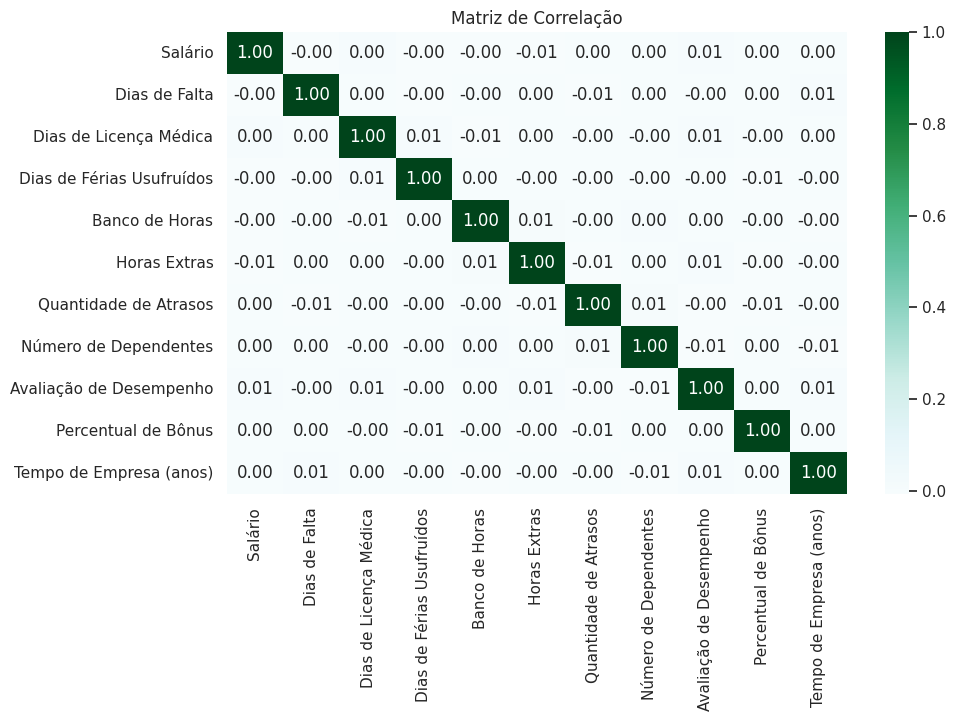

In [121]:
#Matriz de Correlação para salário
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="BuGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


Neste caso, como podemos observar não há variável que representa alguma relação com salário

###Salário x Nível de Escolaridade

Existe alguma relação entre salários e nível de escolaridade?

In [100]:
df.groupby("Cargo")["Salário"].mean().sort_values(ascending=False)
df.groupby("Departamento")["Salário"].mean().sort_values(ascending=False)
df.groupby("Nível de Escolaridade")["Salário"].mean().sort_values(ascending=False)


,Salário
Nível de Escolaridade,
Doutorado,6068.098570
Mestrado,6025.504361
Graduação,6006.565965
Ensino Médio,5992.118622


Como podemos observar, maior escolaridade tem um peso muito pequeno em relação ao valor de salários. Contudo, observamos que existe sim um valor maior de salário atrelado ao maior nível de escolaridade, embora as diferenças sejam muito pequenas.

In [16]:
#verificar quantas pessoas há por cateogria
df["Nível de Escolaridade"].value_counts()

,count
Nível de Escolaridade,
Graduação,25049
Ensino Médio,14995
Mestrado,7383
Doutorado,2573


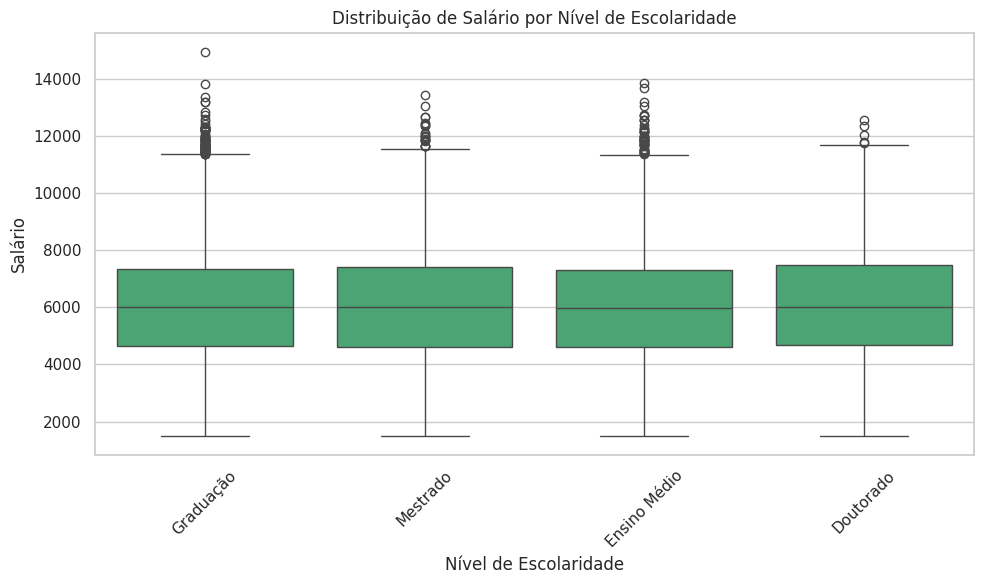

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Nível de Escolaridade", y="Salário", color="mediumseagreen")
plt.title("Distribuição de Salário por Nível de Escolaridade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Apesar de os valores não variarem tanto assim, há uma tendência crescente: quanto **maior** o nível de escolaridade, ligeiramente **maior** o salário **médio**.

Mas o que chama atenção aqui é:

- **A diferença entre Ensino Médio e Doutorado é pequena (menos de R$ 10.000)**

Isso pode indicar que:

- O salário na empresa não depende fortemente da escolaridade;

- Ou que os cargos com maiores salários não exigem necessariamente maior formação;

- Ou ainda que como há poucas pessoas com Doutorado/Mestrado, a média e correlação acabam ficando distorcidas;

###Salário x Departamento

Vamos verificar se a distribuição de salários por departameto possui alguma tendência

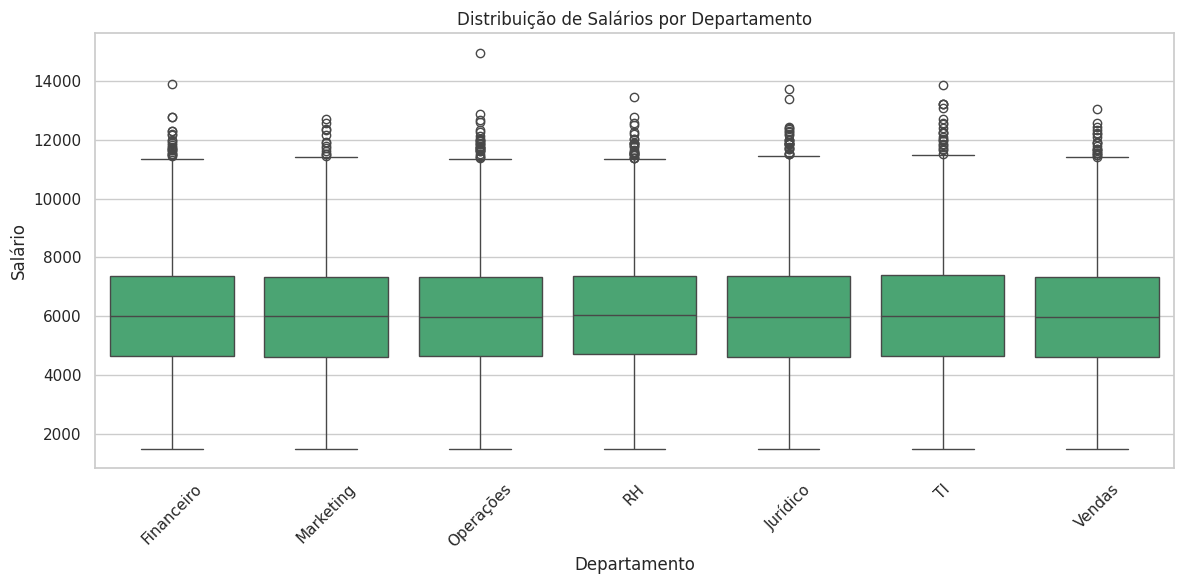

In [119]:
#Comparativo de Salário por Departamento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Departamento", y="Salário", color="mediumseagreen")
plt.xticks(rotation=45)
plt.title("Distribuição de Salários por Departamento")
plt.tight_layout()
plt.show()


A distribuição de salário parece bastante similar entre os departamentos — as medianas estão todas na mesma faixa, assim como os quartis.

Os outliers indicam algumas pessoas com salários mais altos, que aparecem em todos os departamentos, mas a estrutura geral da distribuição é parecida.

Portanto os salários estão distribuídos de forma bastante homogênea entre os departamentos. Não há um departamento com salários visivelmente mais altos ou mais baixos na média ou na mediana.

###Salário X Gênero

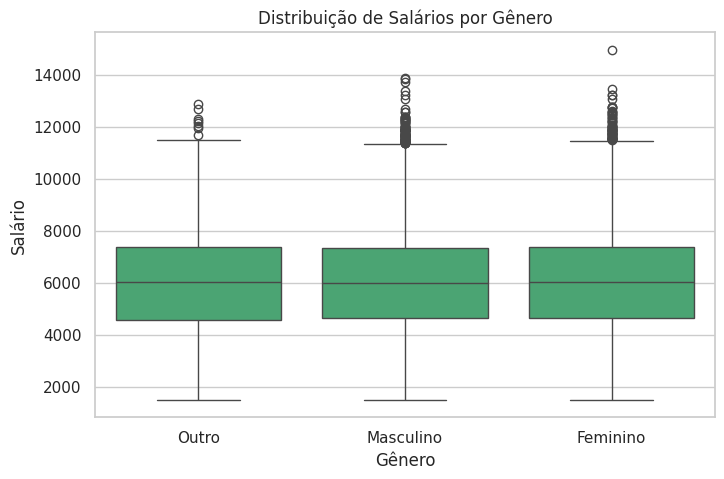

In [120]:
#Comparativo de Salário com Genero

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Gênero", y="Salário", color="mediumseagreen")
plt.title("Distribuição de Salários por Gênero")
plt.show()

Aqui também podemos observar uma distribuição de salários homogenea entre os generos.

##Taxa de Rotatividade

Nesta etapa, analisaremos a saída de colaboradores da empresa. Entender a rotatividade para ajudar a identificar se os funcionários estão ficando por pouco tempo, quais áreas perdem mais pessoas e se há alguma relação com o desempenho ou salários.

O objetivo é descobrir:

- Qual é a taxa de rotatividade geral.

- Quais departamentos ou gestores têm mais saídas.

- Se existe algum padrão entre demissões, desempenho e promoções.

Dessa forma, poderemos entender e pensar em formas de melhorar a retenção dos times.

###Rotatividade

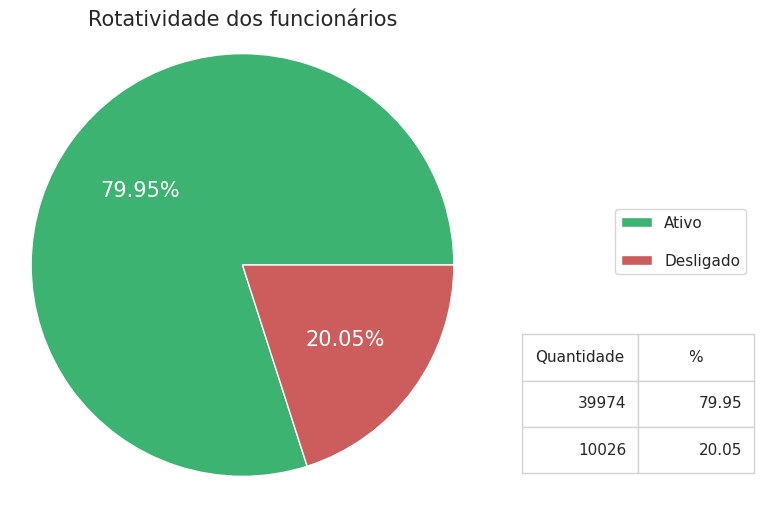

In [144]:
#Calcular as estatísticas no DataFrame para a variável 'Rotatividade'
df_00 = df['Está Ativo'].value_counts()
df_00_perc = df_00 / df_00.sum() * 100
rotatividade = pd.DataFrame({'Qtde': df_00, '%': df_00_perc})

#Criar gráfico de pizza
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['mediumseagreen', 'indianred']

#Capturar os textos do gráfico de pizza
wedges, texts, autotexts = ax.pie(
    rotatividade['%'], labels=None, autopct='%0.2f%%', colors=colors, textprops={'fontsize': 15})

#Alterar a cor da fonte dos rótulos de autopreenchimento para branco
for autotext in autotexts:
    autotext.set_color('white')

#Adicionar legendas
legendas = ['Ativo', 'Desligado']
ax.legend(legendas, loc='right', labelspacing=1.5,
          bbox_to_anchor=(1.0, 0.1, 0.6, 0.9))

#Adicionar tabela
cell_text = rotatividade.apply(
    lambda x: [f'{int(x["Qtde"]):.0f}', f'{x["%"]:.2f}'], axis=1).tolist()
tabela = plt.table(cellText=cell_text, colLabels=[
                   'Quantidade', '%'], loc='bottom right', bbox=(1.1, 0.05, 0.5, 0.3))
tabela.auto_set_font_size(False)
tabela.set_fontsize(11)

#Alterar a cor da grade da tabela
for key, cell in tabela.get_celld().items():
    cell.set_edgecolor('lightgrey')

#Ajustar layout
plt.axis('equal')

#Adicionar título
plt.title('Rotatividade dos funcionários', fontsize=15)

#Exibindo o gráfico
plt.show()

Observa-se que, dos 50000 funcionários, 10026 (aproximadamente 20.05%) não fazem mais parte do quadro de colaboradores. A base analisada não informa o motivo do desligamento, ou seja, não é possível saber se foi uma decisão do próprio colaborador ou da empresa.

###Distribuição de tempo de empresa e taxa de rotatividade

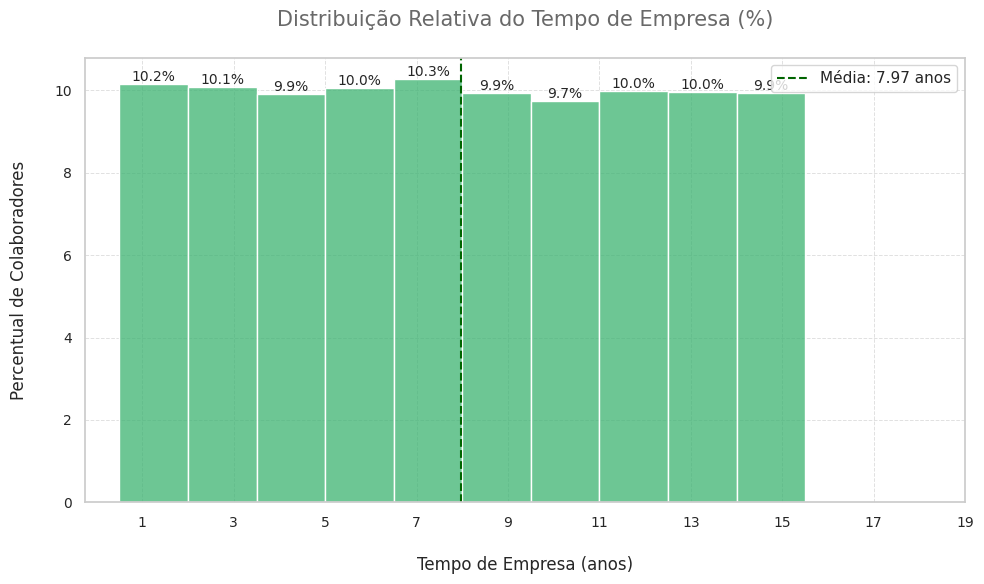

In [104]:
#Total de funcionários
total_funcionarios = len(df)

#Criar o histograma com (percentual)
plt.figure(figsize=(10, 6))
plot = sns.histplot(
    data=df,
    x='Tempo de Empresa (anos)',
    bins=10,
    stat='percent',
    kde=False,
    color='mediumseagreen'
)

#Adicionar o percentual sobre as barras
for p in plot.patches:
    altura = p.get_height()
    plot.annotate(f'{altura:.1f}%',
                  (p.get_x() + p.get_width() / 2., altura),
                  ha='center', va='bottom', fontsize=10)

#Linha média
media_tempo = df['Tempo de Empresa (anos)'].mean()
plt.axvline(x=media_tempo, color='darkgreen', linestyle='--', label=f'Média: {media_tempo:.2f} anos')

#Títulos e eixos
plot.set_title('Distribuição Relativa do Tempo de Empresa (%)\n', fontsize=15, color='dimgray')
plot.set(xlabel='\nTempo de Empresa (anos)', ylabel='Percentual de Colaboradores\n')
plot.tick_params(axis='both', labelsize=10)
plt.xticks(range(1, 20, 2))

#Grade e legenda
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
plt.show()

Podemos identificar que a média de permanência dos colaboradores é em torno de **8 anos**.

- Embora a distribuição também seja homogenea, podemos observar que a maior concentração de colaboradores possui entre 6 e 8 anos;

Rotatividade por Tempo de Empresa

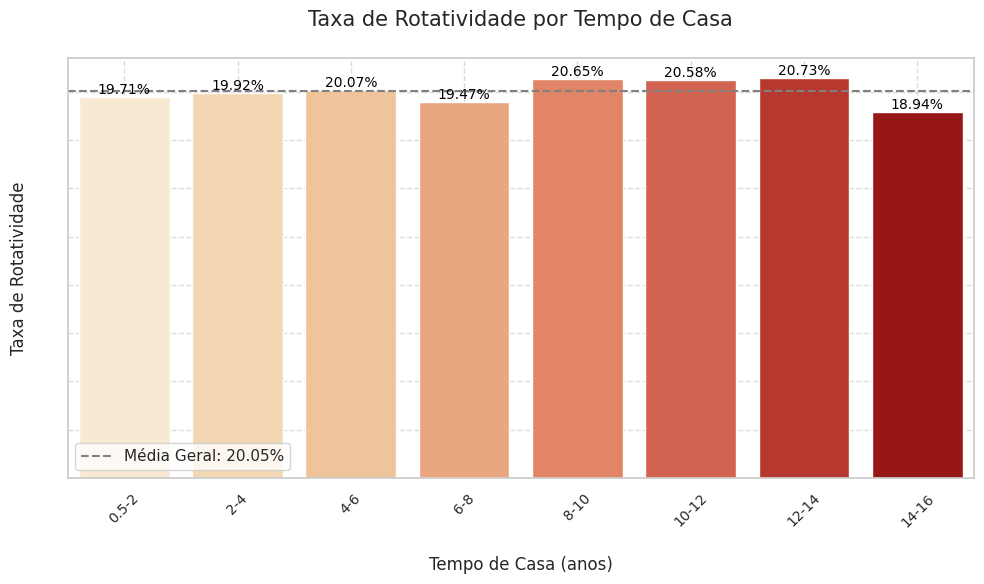

In [112]:
#Colunas no formato correto
df['Tempo de Empresa (anos)'] = pd.to_numeric(df['Tempo de Empresa (anos)'], errors='coerce')
df['Está Ativo'] = df['Está Ativo'].str.strip().str.title()  # Corrigir possíveis espaços/capitalização

#Converter para binário: 1 = ainda na empresa, 0 = saiu
df['AtivoBin'] = df['Está Ativo'].map({'Sim': 1, 'Não': 0})

#Faixas de Tempo de Empresa - iniciar em 0.5 para não ter faixa zerada
bins = [0.5, 2, 4, 6, 8, 10, 12, 14, 16]
labels = ['0.5-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16']
df['FaixaTempo'] = pd.cut(df['Tempo de Empresa (anos)'], bins=bins, labels=labels, right=False)

#Calcular a taxa de rotatividade: 1 - média de quem ficou
rotatividade_por_tempo = 1 - df.groupby('FaixaTempo')['AtivoBin'].mean()

#Plotar o gráfico
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=rotatividade_por_tempo.index.astype(str),
                   y=rotatividade_por_tempo.values, palette='OrRd')

#Título e eixos
plot.set_title('Taxa de Rotatividade por Tempo de Casa\n', fontsize=15)
plot.set(xlabel='\nTempo de Casa (anos)', ylabel='Taxa de Rotatividade\n')
plot.tick_params(axis='both', labelsize=10)

#Linha da média geral
rotatividade_media = 1 - df['AtivoBin'].mean()
plt.axhline(rotatividade_media, color='gray', linestyle='--',
            label=f'Média Geral: {rotatividade_media:.2%}')

#Anotar valores nas barras
for p in plot.patches:
    height = p.get_height()
    if not pd.isna(height):
        plot.annotate(f'{height:.2%}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=10, color='black')


plot.set_yticklabels([])
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


A rotatividade permanece relativamente constante, as barras indicam que a rotatividade é bem próxima entre as faixas. Isso mostra que o percentual de saída não varia muito com o tempo de casa.

- Enocntramos uma leve queda na faixa **14-16 anos**, tem a menor taxa**18,94%** que pode indicar que quem chega a essa senioridade tende a ficar mais;

- A maior rotatividade aparece na faixa 12-14 anos com **20,73%**, mas a diferença é bem pequena, só uns 2 pontos percentuais acima da média geral;

- A média geral está em **20,05%** mostrando que a rotatividade geral da empresa está em torno de 20%;

###Rotatividade x Genero

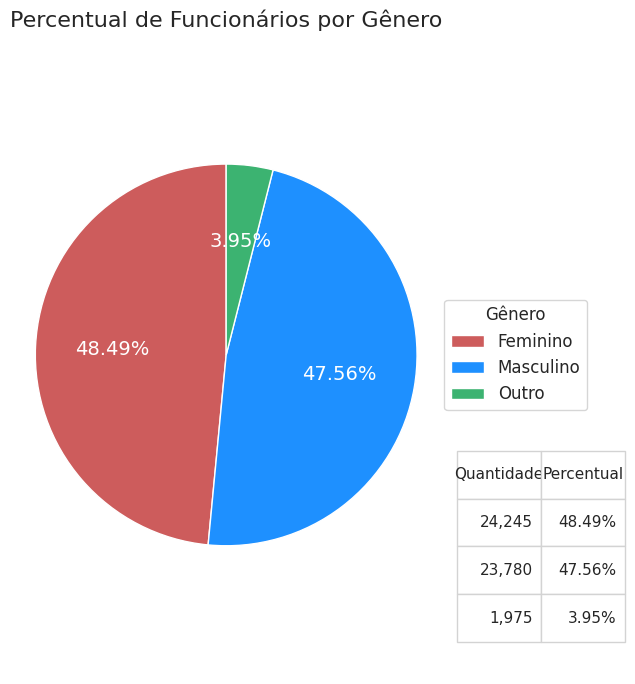

In [113]:
#Contagem e percentual por gênero no df
contagem_genero = df['Gênero'].value_counts()
percentual_genero = contagem_genero / contagem_genero.sum() * 100

funcionarios_por_genero = pd.DataFrame({'Quantidade': contagem_genero, 'Percentual': percentual_genero})

#Definir cores para as três categorias
cores = ['indianred', 'dodgerblue', 'mediumseagreen']

fig, ax = plt.subplots(figsize=(7,7))

#Gráfico de pizza
wedges, texts, autotexts = ax.pie(
    funcionarios_por_genero['Percentual'], labels=None, autopct='%0.2f%%', colors=cores,
    textprops={'fontsize': 14}, startangle=90)

#Valores dentro da pizza
for autotext in autotexts:
    autotext.set_color('white')

#Legendas
ax.legend(funcionarios_por_genero.index, loc='center left', bbox_to_anchor=(1, 0.5),
          fontsize=12, title='Gênero')

#Criar tabela com a contagem e percentual
cell_text = funcionarios_por_genero.apply(
    lambda x: [f'{int(x["Quantidade"]):,}', f'{x["Percentual"]:.2f}%'], axis=1).tolist()

tabela = plt.table(cellText=cell_text, colLabels=['Quantidade', 'Percentual'],
                   loc='bottom right', bbox=(1.05, 0.05, 0.4, 0.3))

tabela.auto_set_font_size(False)
tabela.set_fontsize(11)

#Ajustes visuais da tabela
for key, cell in tabela.get_celld().items():
    cell.set_edgecolor('lightgrey')

plt.axis('equal')  # mantém o círculo perfeito
plt.title('Percentual de Funcionários por Gênero', fontsize=16)

plt.tight_layout()
plt.show()

Observa-se uma predominância de colaboradores do gênero feminino, representando **48.48%**, enquanto os colaboradores do gênero masculino representam **47.56%**. Entretanto há uma minoria de outros generos, com apenas **3.95%**.

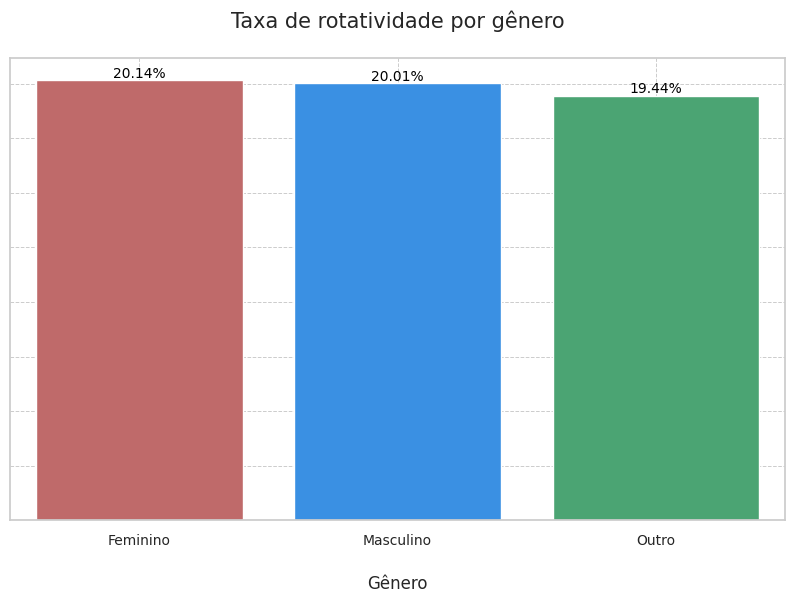

In [114]:
#Calcular a taxa de rotatividade por gênero
rotatividade_por_genero = df.groupby('Gênero')['AtivoBin'].apply(lambda x: 1 - x.mean())

#Cores
cores = ['indianred', 'dodgerblue', 'mediumseagreen']

plt.figure(figsize=(10, 6))
plot = sns.barplot(x=rotatividade_por_genero.index,
                   y=rotatividade_por_genero.values,
                   palette=cores)

#Adicionar título e rótulos
plot.set_title('Taxa de rotatividade por gênero\n', fontsize=15)
plot.set(xlabel='\nGênero', ylabel='')
plot.tick_params(axis='both', labelsize=10)

#Adicionar valores percentuais sobre as barras
for p in plot.patches:
    height = p.get_height()
    plot.annotate(f'{height:.2%}',
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='bottom', fontsize=10, color='black')

#Remover valores do eixo y
plot.set_yticklabels([])

#Formatar grade do gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()


Assim como na quantidade de funcionários do gênero feminino e masculino possuírem pouca diferença, a homogenidade se mantém na taxa de rotatividade também. Contudo, devemos observar o índice de rotatividade de colaboradores com gênero "outros" uma vez que representam a menor faixa da quantidade total de colaboradores e possuem uma taxa de rotatividade na mesma proporção que os outros.

###Cargo x taxa de rotatividade

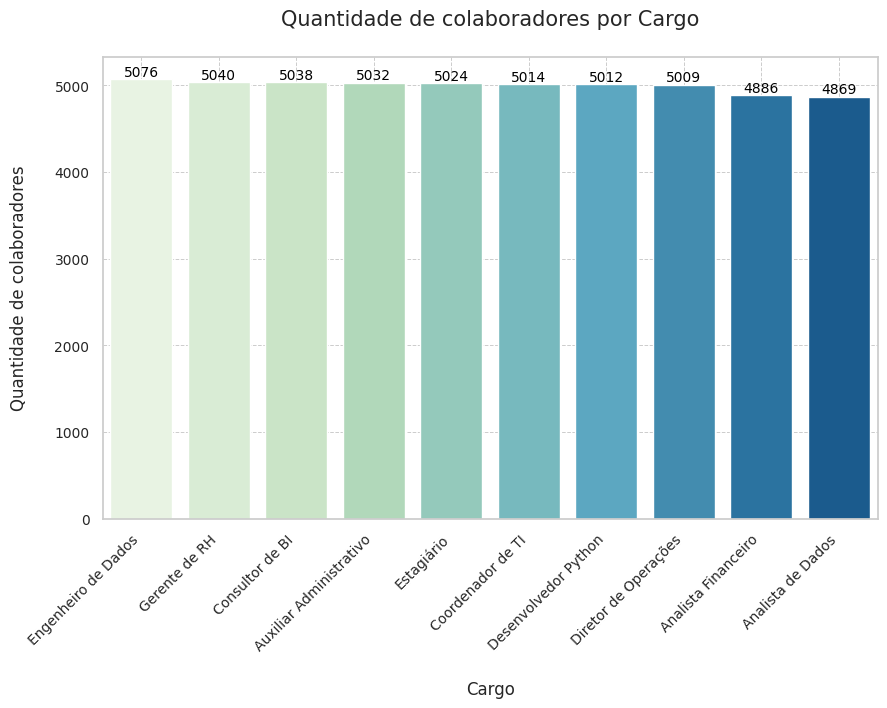

In [128]:
#Calcular a quantidade de colaboradores por Cargo
funcionarios_por_cargo = df['Cargo'].value_counts()

#Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    x=funcionarios_por_cargo.index,
    y=funcionarios_por_cargo.values,
    palette='GnBu'
)

#Adicionar rótulos e título
plot.set_title('Quantidade de colaboradores por Cargo\n', fontsize=15)
plot.set(xlabel='\nCargo', ylabel='Quantidade de colaboradores\n')
plot.tick_params(axis='both', labelsize=10)

#Rotacionando os valores do eixo x
plt.xticks(rotation=45, ha='right')

#Adicionar valores sobre as barras
for p in plot.patches:
    plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black')

#Formatando grade do gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.show()

As funções de Engenheiro de Dados e Gerente de RH, representam os cargos com maior volume de colaboradores na posição.
Embora consideramos uma hegemonia com pouca diferença entre os cargos.

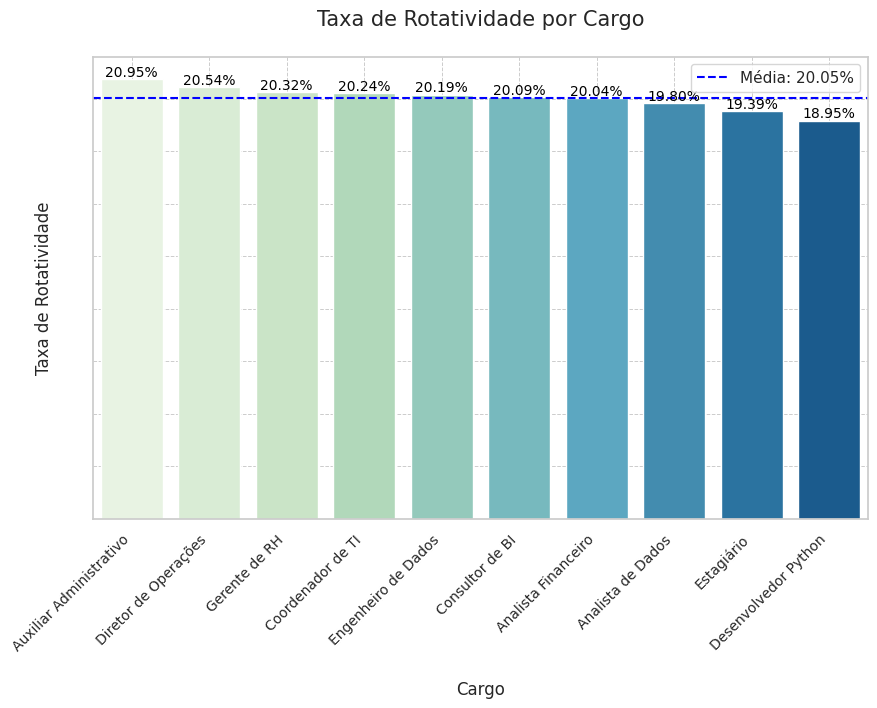

In [131]:
# Calcular a taxa de rotatividade por cargo
rotatividade_por_cargo = 1 - df.groupby('Cargo')['AtivoBin'].mean()
rotatividade_por_cargo = rotatividade_por_cargo.sort_values(ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    x=rotatividade_por_cargo.index,
    y=rotatividade_por_cargo.values,
    palette='GnBu'
)

# Adicionar rótulos e título
plot.set_title('Taxa de Rotatividade por Cargo\n', fontsize=15)
plot.set(xlabel='\nCargo', ylabel='Taxa de Rotatividade\n')
plot.tick_params(axis='both', labelsize=10)

# Adicionando linha horizontal para a média geral
rotatividade_media = 1 - df['AtivoBin'].mean()
plt.axhline(rotatividade_media, color='blue', linestyle='--',
            label=f'Média: {rotatividade_media:.2%}')

# Removendo os valores do eixo y
plot.set_yticklabels([])

# Rotacionando os valores do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar valores sobre as barras
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2%}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black')

# Formatando grade do gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()


Considerando a média de rotatividade de **20.05%**, o cargo com a maior rotatividade é o de Auxiliar Administrativo, enquanto o de menor rotatividade é o de Desenvolvedor Python.

###Distribuição de salário e taxa de rotatividade

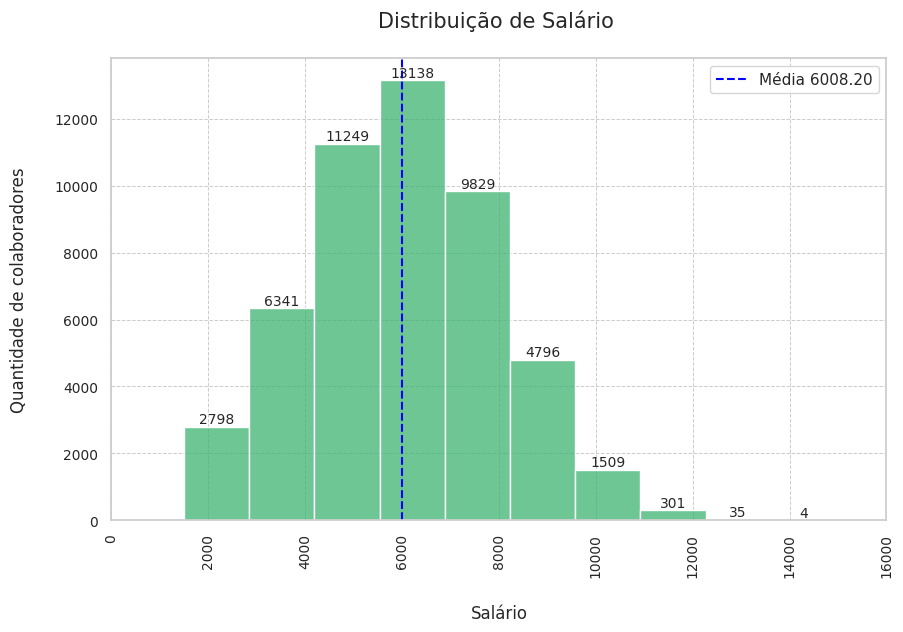

In [135]:
#Criar o gráfico histograma
plt.subplots(figsize=(10, 6))
plot = sns.histplot(data=df, x='Salário',
                    bins=10, kde=False, color='mediumseagreen')

#Adicionando frequência sobre as barras
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (
        p.get_x() + p.get_width() / 2., p.get_height()
    ), ha='center', va='bottom', fontsize=10)

#Adicionando linha vertical para a média
renda_media = df['Salário'].mean()
plt.axvline(x=renda_media, color='blue', linestyle='--',
            label=f'Média {renda_media:.2f}')

#Adicionando e formatando rótulos e título
plot.set_title('Distribuição de Salário \n', fontsize=15)
plot.set(xlabel='\nSalário', ylabel='Quantidade de colaboradores\n')
plot.tick_params(axis='both', labelsize=10)

#Obter valores mínimo e máximo reais do salário
sal_min = int(df['Salário'].min())
sal_max = int(df['Salário'].max())

#Definir um passo de intervalo
intervalo = 2000

#Gerar os ticks do eixo X
ticks = list(range(sal_min - sal_min % intervalo, sal_max + intervalo, intervalo))
plt.xticks(ticks, rotation=90, ha='center')

#Rotacionando os valores do eixo x
plt.xticks(rotation=90, ha='center')

#Formatando grade do gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

#Adicionando a legenda
plt.legend()

#Exibindo o gráfico
plt.show()

A distribuição tem um formato assimétrico à direita, identificando que a maioria dos colaboradores está concentrada nos salários mais baixos, e existe uma cauda longa para salários mais altos.

A Média Salarial é** R$ 6008,20**, e a faixa com maior quantidade de colaboradores **~13 mil** está entre aproximadamente **5.000** e** 6.000** reais concentrando a maioria da força de trabalho.

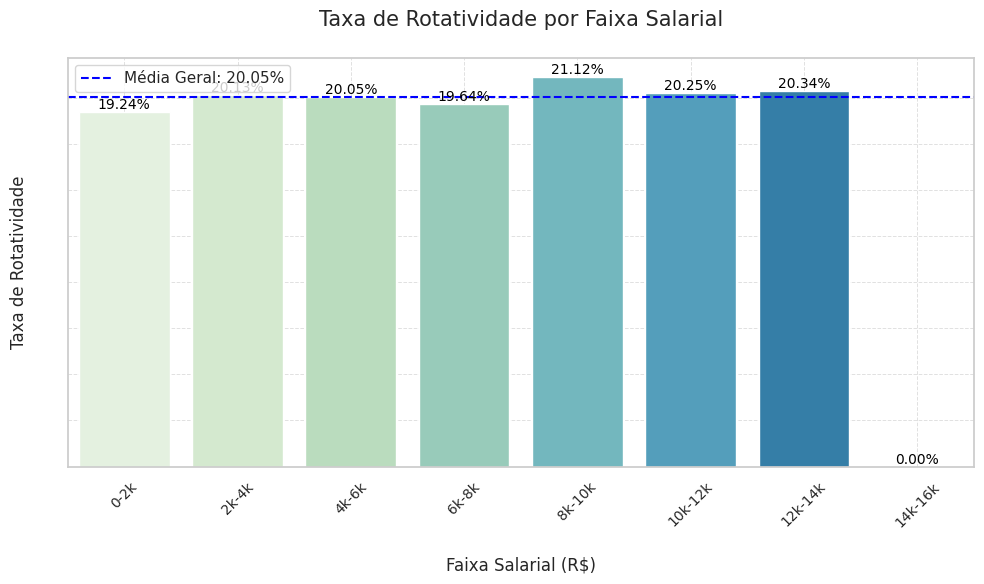

In [137]:
#Criar faixas de salário baseadas no histograma real
bins_salario = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
labels_salario = ['0-2k', '2k-4k', '4k-6k', '6k-8k', '8k-10k', '10k-12k', '12k-14k', '14k-16k']
df['FaixaSalarial'] = pd.cut(df['Salário'], bins=bins_salario, labels=labels_salario, right=False)

#Calcular rotatividade correta (quem saiu = 1 - média de quem ficou)
rotatividade_por_renda = 1 - df.groupby('FaixaSalarial')['AtivoBin'].mean()

#Criar gráfico de barras
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=rotatividade_por_renda.index.astype(str),
                   y=rotatividade_por_renda.values,
                   palette='GnBu')

#Adicionar título, rótulos e estilo
plot.set_title('Taxa de Rotatividade por Faixa Salarial\n', fontsize=15)
plot.set(xlabel='\nFaixa Salarial (R$)', ylabel='Taxa de Rotatividade\n')
plot.tick_params(axis='both', labelsize=10)

#Linha da média geral
rotatividade_media = 1 - df['AtivoBin'].mean()
plt.axhline(rotatividade_media, color='blue', linestyle='--',
            label=f'Média Geral: {rotatividade_media:.2%}')

#Anotar valores sobre as barras
for p in plot.patches:
    height = p.get_height()
    if not pd.isna(height):
        plot.annotate(f'{height:.2%}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=10, color='black')


plot.set_yticklabels([])
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

A média geral de rotatividade está em **20,05%**.

Podemos observar taixas de rotatividade abaixo da média nas faixas salariais mais baixas.

A faixa 14k- 16k representa a menor taixa de rotatividade, mas devemos levar em consideração a amostra dessa faixa era muito pequena em comparação as outras faixas.


###Avaliação de performance/desempenho no trabalho e taxa de rotatividade

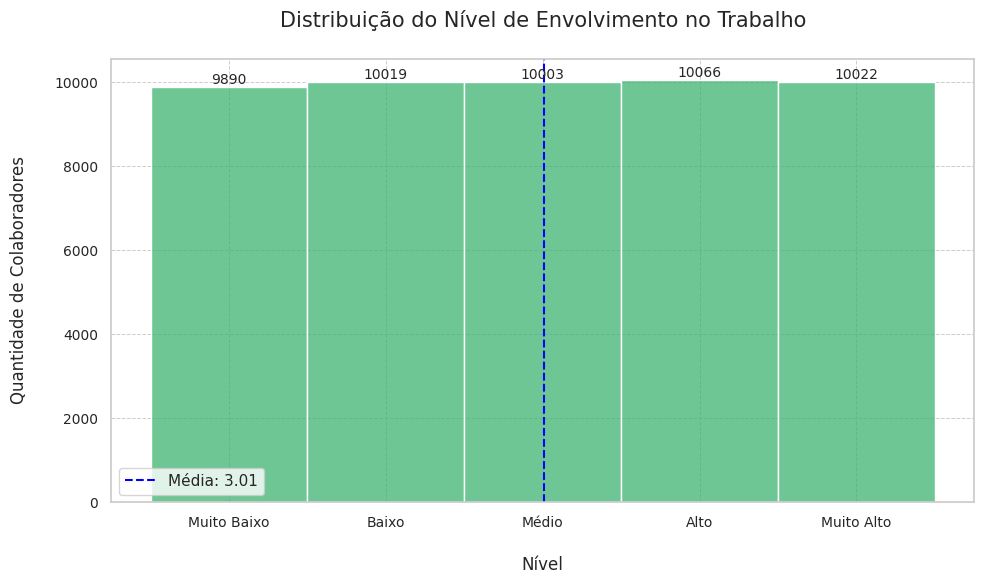

In [139]:
plt.subplots(figsize=(10, 6))
plot = sns.histplot(
    data=df,
    x='Avaliação de Desempenho',
    bins=5,
    binrange=(0.5, 5.5),
    kde=False,
    color='mediumseagreen'
)

#Frequência sobre as barras
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10)

#Linha da média
envolvimento_media = df['Avaliação de Desempenho'].mean()
plt.axvline(x=envolvimento_media, color='blue', linestyle='--',
            label=f'Média: {envolvimento_media:.2f}')

#Título e rótulos
plot.set_title('Distribuição do Nível de Envolvimento no Trabalho\n', fontsize=15)
plot.set(xlabel='\nNível', ylabel='Quantidade de Colaboradores\n')
plot.tick_params(axis='both', labelsize=10)

#Ajustar rótulos do eixo X
plt.xticks([1, 2, 3, 4, 5])
plot.set_xticklabels(['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])

#Grade, legenda e exibição
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Observamos novamente uma distribuição bastante equilibrada. Todas as categorias têm aproximadamente **10 mil** colaboradores. A mais baixa **“Muito Baixo” (1)**, tem 9.890 e a mais alta **“Alto” (4)** tem 10.066.

Sugerindo uniformidade no processo de avaliação. Seria interessante encontrarmos mais formas de analisar a performance do colaborador e entender se a avaliação está sendo justa e criteriosa.


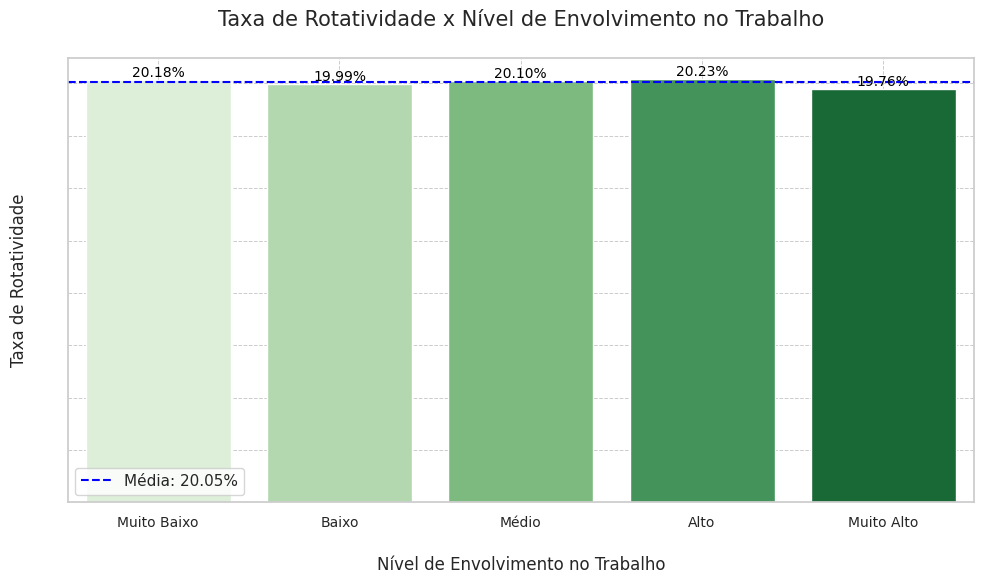

In [141]:
#Taxa de rotatividade
rotatividade_x_trabalho_vida = 1 - df.groupby('Avaliação de Desempenho')['AtivoBin'].mean()

#criar o gráfico de barras
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=rotatividade_x_trabalho_vida.index,
                   y=rotatividade_x_trabalho_vida.values,
                   palette='Greens')  # paleta verde

#Adicionar rótulos e título
plot.set_title('Taxa de Rotatividade x Nível de Envolvimento no Trabalho\n', fontsize=15)
plot.set(xlabel='\nNível de Envolvimento no Trabalho', ylabel='Taxa de Rotatividade\n')
plot.tick_params(axis='both', labelsize=10)

#Linha da média geral de rotatividade
rotatividade_media = 1 - df['AtivoBin'].mean()
plt.axhline(rotatividade_media, color='blue', linestyle='--',
            label=f'Média: {rotatividade_media:.2%}')

#Adicionar valores sobre as barras
for p in plot.patches:
    height = p.get_height()
    if not pd.isna(height):
        plot.annotate(f'{height:.2%}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=10, color='black')

#Limpar y-ticks e renomear x-ticks
plot.set_yticklabels([])
plot.set_xticklabels(['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])

#Grade e legenda
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


A taxa de rotatividade se mantém uniforme dentre os níveis de avaliação.
Demonstrando que talvez a "Avaliação de Desempenho" não seja um critério para desligamento.

##Demissões ao longo do tempo
Nesta etapa da análise, buscamos compreender o perfil e o comportamento das demissões dentro da organização. Considerando que aproximadamente 20% dos colaboradores não estão mais ativos, é fundamental investigar como essa rotatividade se distribui ao longo do tempo de empresa e entre diferentes grupos.

A análise foca em identificar tendências, padrões de saída e possíveis fatores associados ao desligamento, como o tempo de casa, departamento, gênero e avaliação de desempenho. Esses dados são essenciais para compreender os riscos de perda de talentos e orientar estratégias mais eficazes de retenção.

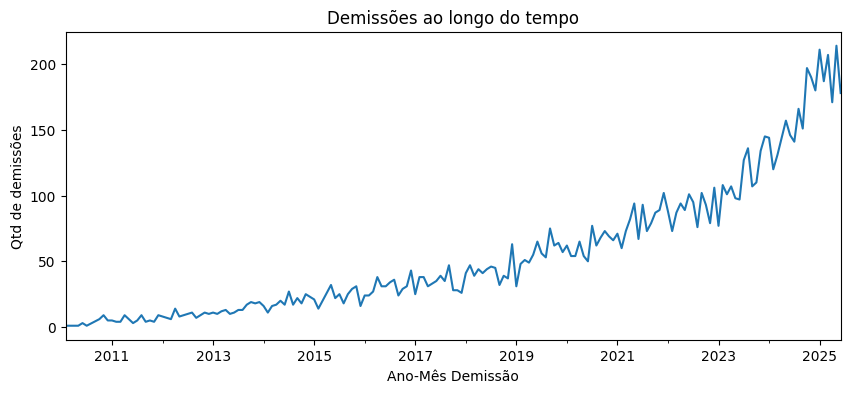

In [41]:

df['Data de Demissão'] = pd.to_datetime(df['Data de Demissão'], errors='coerce')
df['Ano-Mês Demissão'] = df['Data de Demissão'].dt.to_period('M')

demissoes_por_mes = df.dropna(subset=['Data de Demissão'])['Ano-Mês Demissão'].value_counts().sort_index()

demissoes_por_mes.plot(kind='line', title='Demissões ao longo do tempo', figsize=(10,4))
plt.ylabel('Qtd de demissões')
plt.show()



Podemos observar uma tendência clara de crescimento de demissões ao longo dos anos, o que pode significar também um aumento no quadro de funcionários.

Vamos observar o crescimento da empresa com a análise de admissões.

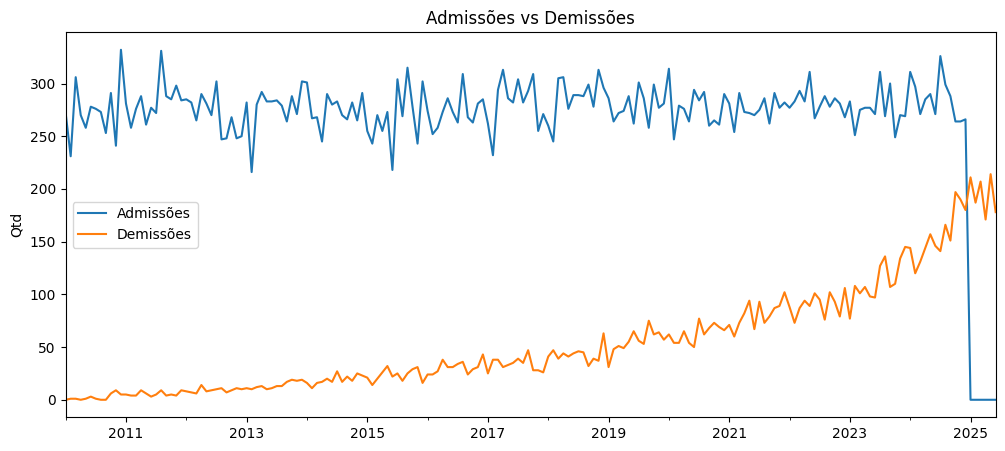

In [46]:
df['Data de Admissão'] = pd.to_datetime(df['Data de Admissão'], errors='coerce')
df['Ano-Mês Admissão'] = df['Data de Admissão'].dt.to_period('M')

admissoes = df['Ano-Mês Admissão'].value_counts().sort_index()
demissoes = df['Ano-Mês Demissão'].value_counts().sort_index()

# Unir em um dataframe
fluxo = pd.DataFrame({
    'Admissões': admissoes,
    'Demissões': demissoes
}).fillna(0)

fluxo.plot(title='Admissões vs Demissões', figsize=(12,5))
plt.ylabel('Qtd')
plt.show()


Ao compararmos o número de admissões com demissões, percebemos que o número de admissões mantêm um volume alto e relativamente estável desde 2010 até o início de 2024.

No entanto, há uma queda abrupta no final da série temporal (2025), chegando praticamente a zero e observando diretamente a base, podemos identificar que só temos valores de admissão até Dez/2024. Seria necessário entender e verificar a captura destes para analisar esse período.

Em demissões podemos observar uma tendência clara de crescimento, saindo de valores próximos a zero em 2010 e ultrapassando 200 por mês em 2025. A curva é ascendente e constante, indicando aumento na rotatividade, especialmente acentuado a partir de 2020.

Apesar da empresa continuar contratando em volume elevado, as demissões cresceram muito mais nos últimos anos, o que indica aumento da rotatividade.

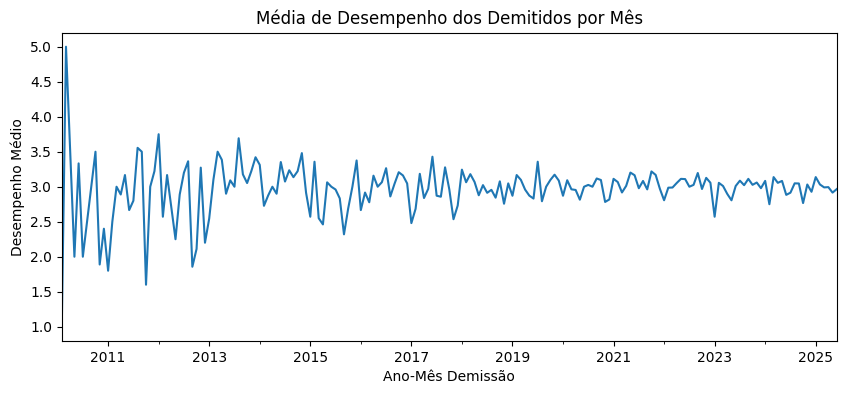

In [42]:
# Só demitidos
df_demitidos = df[df['Data de Demissão'].notna()]

# Média de desempenho dos demitidos por mês
media_perf_demitidos = df_demitidos.groupby('Ano-Mês Demissão')['Avaliação de Desempenho'].mean()

media_perf_demitidos.plot(kind='line', title='Média de Desempenho dos Demitidos por Mês', figsize=(10,4))
plt.ylabel('Desempenho Médio')
plt.show()

Observamos que a empresa passou a demitir mais colaboradores com desempenho médio, não necessariamente os de pior performance.

Isso pode indicar que o desempenho não é o único critério para desligamento, sugerindo influência de outros fatores.

A estabilidade da linha nos últimos anos pode refletir processos mais padronizados de desligamento, mas sem foco exclusivo nos piores desempenhos.

Não observamos demissões em colaboradores com alto desempenho ao longo dos anos.


###Tendência por departamento: quem está crescendo ou diminuindo?

In [65]:
admissoes_dep = df.groupby('Departamento')['Data de Admissão'].count()
demissoes_dep = df['Departamento'][df['Data de Demissão'].notna()].value_counts()

departamento_fluxo = pd.DataFrame({
    'Admissões': admissoes_dep,
    'Demissões': demissoes_dep
}).fillna(0)

departamento_fluxo['Saldo'] = departamento_fluxo['Admissões'] - departamento_fluxo['Demissões']
departamento_fluxo.sort_values('Saldo', ascending=False)

,Admissões,Demissões,Saldo
Departamento,,,
TI,7240,1418,5822
RH,7215,1447,5768
Operações,7122,1382,5740
Marketing,7170,1443,5727
Financeiro,7171,1455,5716
Vendas,7113,1465,5648
Jurídico,6969,1416,5553


Todos os departamentos tiveram saldo positivo, ou seja, admitiram mais do que demitiram no período analisado.

O departamento de **TI** foi o que mais cresceu, com **7.240** admissões e um saldo de **+5.822** colaboradores.

O **Jurídico** teve o menor saldo de crescimento, com **5.553**, embora ainda positivo.

As diferenças entre os saldos são relativamente pequenas, sugerindo que o crescimento foi bem distribuído entre os departamentos.

Mesmo departamentos com número elevado de demissões, como Vendas e Financeiro, mantiveram saldo significativamente positivo, indicando expansão ou substituição planejada de pessoal.

O saldo positivo em todos os departamentos pode indicar também uma rotatividade controlada, com maior foco em contratações do que cortes.

###Demissões por gestor

In [142]:
#Agrupar por ID do Gestor e verificar o saldo
gestores_fluxo = df.groupby('ID do Gestor').agg({
    'Data de Admissão': 'count',
    'Data de Demissão': lambda x: x.notna().sum()
})

#Renomear colunas
gestores_fluxo.columns = ['Admissoes', 'Demissoes']

#Calcular proporção (decimal)
gestores_fluxo['Proporcao'] = gestores_fluxo['Demissoes'] / gestores_fluxo['Admissoes']

#Calcular proporção formatada como percentual (string)
gestores_fluxo['Proporcao (%)'] = (gestores_fluxo['Proporcao'] * 100).map('{:.2f}%'.format)

#Ordenar pela proporção decimal
gestores_fluxo = gestores_fluxo.sort_values('Proporcao', ascending=False)

#Exibir
print(gestores_fluxo.head())

              Admissoes  Demissoes  Proporcao Proporcao (%)
ID do Gestor                                               
EMP_00445            51         21   0.411765        41.18%
EMP_00844            40         15   0.375000        37.50%
EMP_00324            65         24   0.369231        36.92%
EMP_00865            52         19   0.365385        36.54%
EMP_00851            47         17   0.361702        36.17%


A coluna "Admissoes" mostra quantas pessoas o gestor contratou.

A coluna "Demissoes" mostra quantas dessas pessoas foram desligadas.

A coluna "Proporcao" representa a taxa de desligamento sobre o total admitido. Por exemplo, um valor de 0.41 indica que 41% das admissões feitas por esse gestor resultaram em demissão.

O volume de gestores é muito grande para avaliarmos apenas desta forma, iremos agrupá-los por faixa de Taxa de Rotatividade.

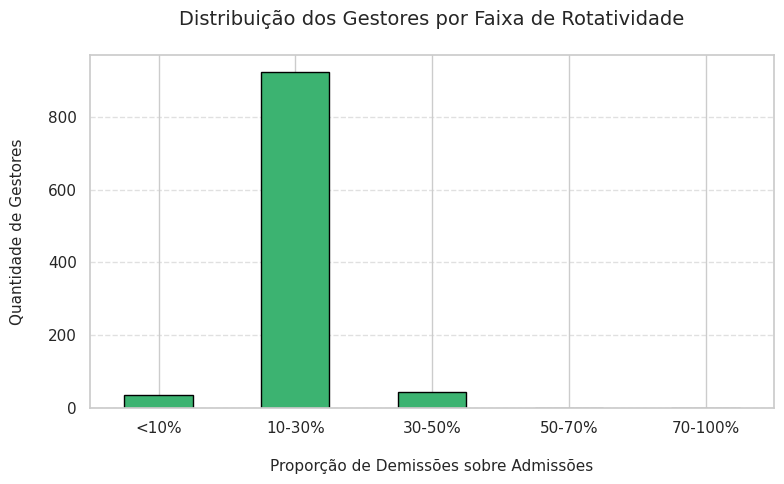

In [143]:
#Calcular admissões e demissões por gestor
gestores_fluxo = df.groupby('ID do Gestor').agg({
    'Data de Admissão': 'count',
    'Data de Demissão': lambda x: x.notna().sum()
})

gestores_fluxo.columns = ['Admissoes', 'Demissoes']

#Calcular proporção de demissões sobre admissões
gestores_fluxo['Proporcao'] = gestores_fluxo['Demissoes'] / gestores_fluxo['Admissoes']

#Filtrar apenas gestores com pelo menos 20 admissões para evitar distorções
gestores_filtrados = gestores_fluxo[gestores_fluxo['Admissoes'] >= 20]

#Agrupar por faixas de rotatividade para facilitar a leitura dos dados
bins = [0, 0.1, 0.3, 0.5, 0.7, 1.0]
labels = ['<10%', '10-30%', '30-50%', '50-70%', '70-100%']
gestores_filtrados['Faixa de Rotatividade'] = pd.cut(gestores_filtrados['Proporcao'], bins=bins, labels=labels)

#Contar quantos gestores estão em cada faixa
rotatividade_faixa = gestores_filtrados['Faixa de Rotatividade'].value_counts().sort_index()

#Visualizar os resultados com um gráfico de barras
plt.figure(figsize=(8, 5))
rotatividade_faixa.plot(kind='bar', color='mediumseagreen', edgecolor='black')

plt.title('Distribuição dos Gestores por Faixa de Rotatividade\n', fontsize=14)
plt.xlabel('\nProporção de Demissões sobre Admissões', fontsize=11)
plt.ylabel('Quantidade de Gestores\n', fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

#Exibir o gráfico
plt.tight_layout()
plt.show()

Encontramos então a maior parte dos Gestores com rotatividade, entre **10 - 30 %**, que pode ser considerado como uma boa retenção nas equipes.

##Desempenho

###Atrasos por turno em proporção

In [79]:
#Total de colaboradores por turno
total_por_turno = df.groupby('Turno')['ID do Colaborador'].nunique()

#Total de colaboradores com pelo menos 1 atraso por turno
atrasos_por_turno = df[df['Quantidade de Atrasos'] > 0].groupby('Turno')['ID do Colaborador'].nunique()

#Proporção de atrasos
proporcao_atrasos = (atrasos_por_turno / total_por_turno).sort_values(ascending=False)
print(proporcao_atrasos)


Turno
Tarde    0.993615
Noite    0.993277
Manhã    0.992882
Name: ID do Colaborador, dtype: float64



- Turno da Tarde: 99,36% dos colaboradores têm pelo menos 1 atraso.

- Turno da Noite: 99,33% também têm ao menos 1 atraso.

- Turno da Manhã: 99,29% com atraso.

Ou seja, independentemente do turno, praticamente todos os colaboradores registraram atrasos em algum momento e a diferença entre turnos é mínima (menos de 0,1 ponto percentual).

Vamos calcular a média de atrasos por colaborador em cada turno para entender quais turnos têm, em média, mais atrasos por pessoa, e não apenas a proporção de quem já se atrasou.

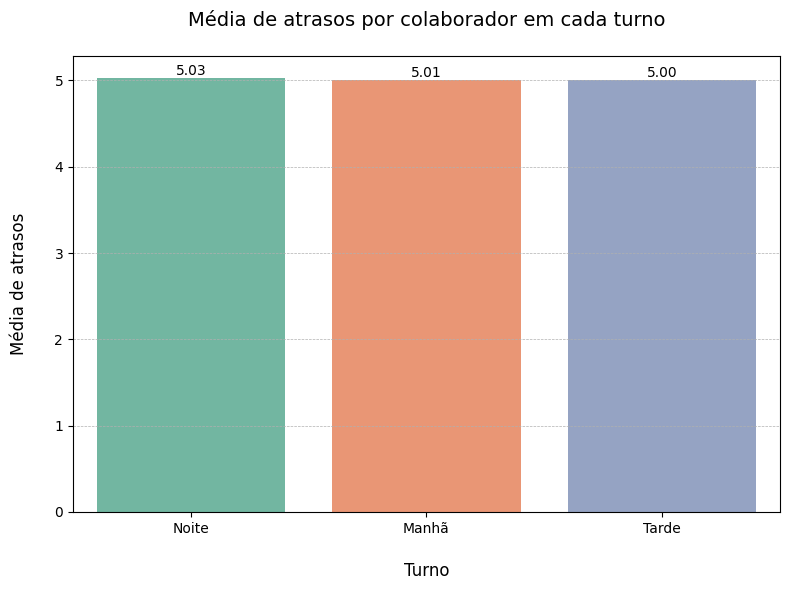

In [80]:
#Calcular o total de colaboradores únicos por turno
total_colaboradores = df.groupby('Turno')['ID do Colaborador'].nunique()

#Calcular o total de atrasos por turno
total_atrasos = df.groupby('Turno')['Quantidade de Atrasos'].sum()

#Calcular a média de atrasos por colaborador em cada turno
media_atrasos_por_colaborador = (total_atrasos / total_colaboradores).sort_values(ascending=False)

#Visualização da média de atrasos por turno
plt.figure(figsize=(8, 6))
plot = sns.barplot(
    x=media_atrasos_por_colaborador.index,
    y=media_atrasos_por_colaborador.values,
    palette='Set2'
)

#Títulos e rótulos
plot.set_title('Média de atrasos por colaborador em cada turno\n', fontsize=14)
plot.set_xlabel('\nTurno', fontsize=12)
plot.set_ylabel('Média de atrasos\n', fontsize=12)
plot.tick_params(axis='both', labelsize=10)

#Adiciona valores acima das barras
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10)

plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

A diferença entre os turnos é muito pequena, menos de 0.05 atrasos por colaborador, o que sugere que o turno, isoladamente, não é um fator determinante para atrasos.

##Performance vs. Horas Extras

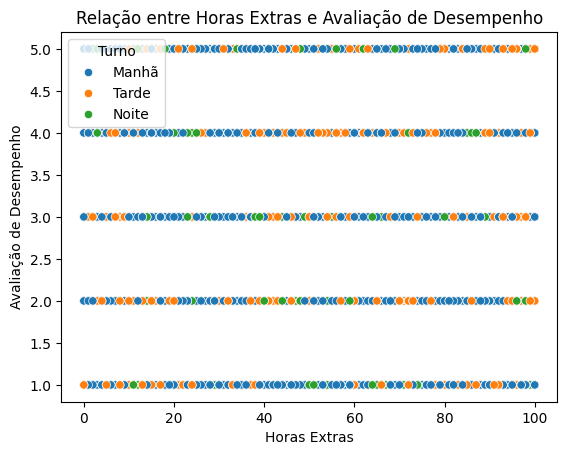

,Horas Extras,Avaliação de Desempenho
Horas Extras,1.000000,0.006991
Avaliação de Desempenho,0.006991,1.000000


In [82]:
sns.scatterplot(data=df, x='Horas Extras', y='Avaliação de Desempenho', hue='Turno')
plt.title("Relação entre Horas Extras e Avaliação de Desempenho")
plt.show()

# Correlação
df[['Horas Extras', 'Avaliação de Desempenho']].corr()

O gráfico de dispersão mostra uma distribuição bem espalhada das avaliações em todos os níveis de horas extras, com avaliações concentradas principalmente nas notas inteiras (de 1 a 5) o que confere com a base que temos.

Não há um padrão claro de correlação visual sugerindo que pessoas com muitas horas extras podem ter tanto notas altas quanto baixas.

O critério de avaliação de desempenho, nessa base, não parece considerar ou depender da quantidade de horas extras feitas.


##Tempo médio de promoção

In [84]:
#Calcular o tempo para promoção em anos
df['Tempo para Promoção'] = (df['Data da Última Promoção'] - df['Data de Admissão']).dt.days / 365

#Filtrar apenas quem foi promovido (não nulo)
promovidos = df[df['Tempo para Promoção'].notna()]

#Tempo médio para promoção geral
tempo_promocao_geral = promovidos['Tempo para Promoção'].mean()
print(f"⏱️ Tempo médio para promoção (geral): {tempo_promocao_geral:.2f} anos")

#Tempo médio para promoção por faixa de desempenho
tempo_promocao_por_perf = promovidos.groupby('Avaliação de Desempenho')['Tempo para Promoção'].mean().sort_index()

print("\n📈 Tempo médio para promoção por desempenho:")
print(tempo_promocao_por_perf)

⏱️ Tempo médio para promoção (geral): 4.61 anos

📈 Tempo médio para promoção por desempenho:
Avaliação de Desempenho
1    4.646500
2    4.546127
3    4.554661
4    4.678925
5    4.637372
Name: Tempo para Promoção, dtype: float64


A diferença de tempo entre notas baixas e altas é muito pequena.
Em média, todos os colaboradores são promovidos após ~4.6 anos, independente do desempenho.

Isso pode indicar que o critério de promoção não está alinhado com a performance individual, o que é um insight importante para RH ou liderança.

###Permanência, promoção e performance por departamento

Tempo médio de promoção x Performance média
- **Hipótese**: colaboradores com desempenho mais alto são promovidos mais rápido.
- **Correlação negativa esperada:** quanto maior o desempenho, menor o tempo médio para promoção.

Performance média x Número de promoções.
- **Hipótese**: departamentos com maior média de desempenho realizam mais promoções.
- Pode indicar que os gestores reconhecem e recompensam bons desempenhos.

Tempo médio de promoção x Número de promoções
- **Hipótese**: quanto mais promoções são feitas, menor tende a ser o tempo médio.
- Pode indicar processos de progressão de carreira mais ágeis.

In [87]:
#Calcular tempo (anos) desde admissão até a última promoção
df['Tempo para Promoção'] = (df['Data da Última Promoção'] - df['Data de Admissão']).dt.days / 365

#Tempo médio para promoção por departamento
tempo_medio_dep = df[df['Tempo para Promoção'].notna()].groupby('Departamento')['Tempo para Promoção'].mean()

#Quantidade de promoções por departamento
promocoes_dep = df[df['Data da Última Promoção'].notna()].groupby('Departamento').size()

#Performance média por departamento
perf_media_dep = df.groupby('Departamento')['Avaliação de Desempenho'].mean()

#Combinar tudo
dep_analise = pd.DataFrame({
    'Tempo Médio (anos)': tempo_medio_dep,
    'Promoções': promocoes_dep,
    'Performance Média': perf_media_dep
}).fillna(0).sort_values('Tempo Médio (anos)', ascending=True)

print(dep_analise)

              Tempo Médio (anos)  Promoções  Performance Média
Departamento                                                  
Operações               4.563765       3493           2.981466
RH                      4.586443       3524           3.043382
TI                      4.586562       3465           3.000829
Financeiro              4.602739       3486           3.035420
Vendas                  4.622862       3436           2.980177
Marketing               4.630238       3387           2.992329
Jurídico                4.700858       3377           3.009471


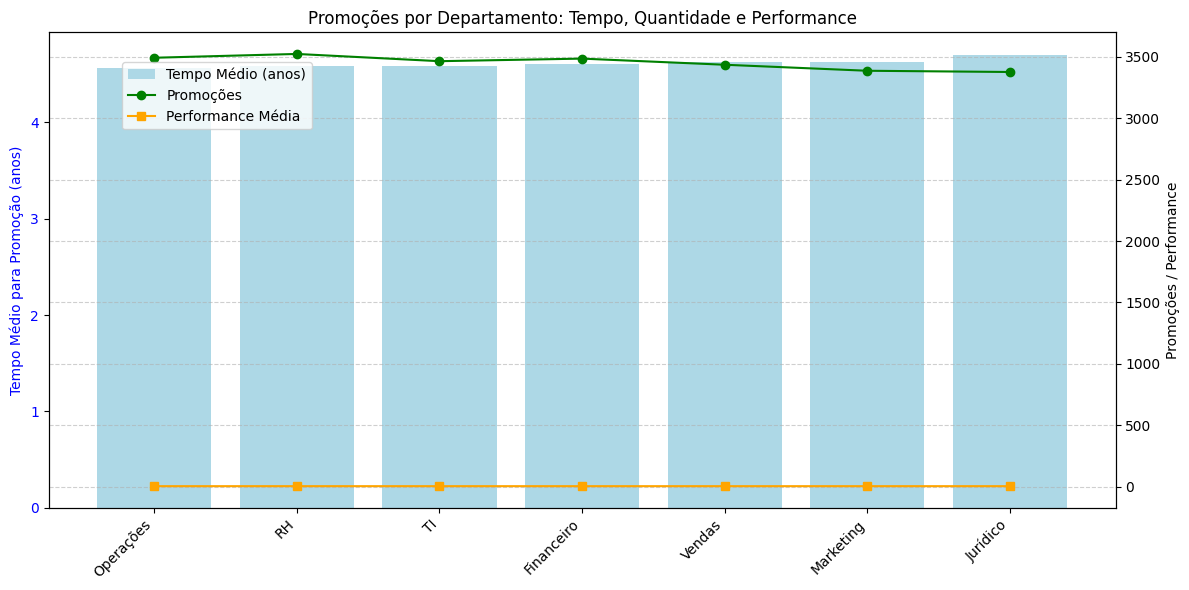

In [88]:
# Plot múltiplos eixos para facilitar leitura
fig, ax1 = plt.subplots(figsize=(12,6))

departamentos = dep_analise.index
tempo = dep_analise['Tempo Médio (anos)']
promocoes = dep_analise['Promoções']
performance = dep_analise['Performance Média']

# Barra: Tempo médio
ax1.bar(departamentos, tempo, color='lightblue', label='Tempo Médio (anos)')
ax1.set_ylabel('Tempo Médio para Promoção (anos)', color='blue')
ax1.set_xticklabels(departamentos, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

# Eixo secundário: Promoções e Performance
ax2 = ax1.twinx()
ax2.plot(departamentos, promocoes, color='green', marker='o', label='Promoções')
ax2.plot(departamentos, performance, color='orange', marker='s', label='Performance Média')
ax2.set_ylabel('Promoções / Performance', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Promoções por Departamento: Tempo, Quantidade e Performance')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

Mesmo com dados bastante uniformes podemos concluir que o **Jurídico** é o que mais demora em média para promover (**4,70 anos**), enquanto Operações promove ligeiramente mais rápido (**4,56 anos**).
Os departamentos de **RH** (3.524 promoções) e **Operações** (3.493 promoções) como os que mais promoveram.

Departamentos como Vendas e Operações têm médias ligeiramente mais baixas (2,98), o que pode indicar necessidade de suporte ou desenvolvimento.

Os departamentos possuem cadências de promoção semelhantes, mas o volume de promoções e a qualidade do desempenho podem variar levemente.

O RH se destaca tanto em número de promoções quanto em desempenho médio — o que pode refletir boas práticas internas de desenvolvimento.

Marketing e Jurídico têm o menor número de promoções e tempos médios um pouco maiores — o que pode ser analisado mais a fundo (restrições de estrutura, critérios de promoção mais rígidos, etc.).

### Sobre dados fictícios e ausência de correlação

É super importante registrar que:

- **Nenhuma correlação significativa também é insight!**
- Significa que variáveis testadas **não têm relação linear relevante** no contexto atual
- Pode indicar dados simulados ou necessidade de outros tipos de análise (não linear, qualitativa, etc)
- Em apresentação, vale explicar isso para não parecer que "não fez análise"


#Conclusões finais

##Rotatividade
- Aproximadamente 20% da força de trabalho foi desligada, mas não há informação sobre o motivo (voluntário ou involuntário).

- A taxa de rotatividade se mantém alta e estável ao longo do tempo, com leve variação entre faixas de tempo de casa.

- Departamentos com maior saldo positivo de admissões: TI, RH e Operações.

- Não foram encontrados casos de “troca intensa” (admissões ≅ demissões) nos departamentos, sugerindo crescimento ou estabilidade, e não reposição contínua.

## Admissões e demissões ao longo do tempo
- As admissões se mantêm em um patamar elevado e constante até recentemente.

- Já as demissões têm crescido continuamente, indicando uma possível tendência de aumento no turnover nos últimos anos.


##Desempenho e demissões
- A avaliação média de desempenho dos demitidos se manteve em torno de 3.0 (escala de 1 a 5), com pouca variação ao longo do tempo.

- Isso sugere que as demissões não são fortemente direcionadas por baixa performance, ou que a avaliação não discrimina bem o desempenho.

##Promoções
- O tempo médio até a promoção é de ~4,6 anos, com pouca diferença entre departamentos e faixas de desempenho.

- Departamentos com mais promoções: RH, Operações e TI.

- A performance média dos promovidos também não apresenta grandes variações entre áreas, sugerindo que promoções seguem um ciclo de tempo, não de performance.

##Gestores

- Foram identificados gestores com altas taxas de demissão (>40% dos colaboradores admitidos).

- A maioria dos gestores concentra uma taxa de demissão abaixo de 30%, mas ainda há dispersão significativa.

- Pode indicar diferenças na gestão de pessoas ou contexto organizacional específicos por área.

## Carga Horária e Desempenho
- Não há correlação relevante entre horas extras e avaliação de desempenho (correlação ≈ 0.007).

- Isso mostra que trabalhar mais horas não está associado a melhor performance, ao menos nos critérios avaliados.

##Conclusão Final

A organização apresenta padrões estáveis de gestão de pessoas, com políticas de bônus e promoção uniformes, porém pouco conectadas a desempenho. Há uma tendência recente de aumento nas demissões e redução nas admissões, o que merece atenção. A gestão de pessoas por alguns líderes pode estar mais vulnerável, indicando espaço para ações específicas por gestor ou departamento. A avaliação de desempenho parece desconectada de variáveis comportamentais e operacionais (como atrasos ou horas extras), sugerindo possível revisão dos critérios avaliativos.